<a href="https://colab.research.google.com/github/MutukuMwende/Heart-failure-project/blob/main/Medical_Data_Manipulation_and_Preprocessing_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 6 Assignment: Medical Data Manipulation and Preprocessing**

## **Overview**
In this assignment, you will work with **3D MRI scans** from the **BraTS2021 dataset** available on **Kaggle**. You will focus on essential data preprocessing techniques used in medical imaging.  

### **Dataset**
- Use the **[BraTS2021 dataset](https://www.kaggle.com/datasets/dschettler8845/brats-2021-task1)** from Kaggle.
- Ensure proper handling of `.nii.gz` files, which contain 3D MRI scans.

## **Assignment Tasks**
### ✅ **Task 1: Load a 3D MRI Scan**
- Extract and load a **3D MRI scan** from a `.tar` archive.
- Handle file paths and ensure proper loading of the `.nii.gz` format.

### ✅ **Task 2: Apply Preprocessing and Visualization**
- Normalize and preprocess the MRI images.
- Use **visualization techniques** to inspect different slices of the scan.

### ✅ **Task 3: Perform Image Augmentation**
- Apply **data augmentation** techniques such as rotation, flipping, and intensity adjustments.
- Increase dataset variability to improve model generalization.

### ✅ **Task 4: Implement a PyTorch DataLoader**
- Write a **PyTorch DataLoader** to efficiently load and process the images.
- Ensure it supports **batching, shuffling, and transformations**.

## **Submission Guidelines**
1. **Use GitHub for submission**:
   - Accept the assignment using your **Team's GitHub account**.
   - Use the **provided Template Notebook** as a guide.
  
2. **Push your final notebook**:
   - Ensure your **notebook (.ipynb)** is well-structured and documented.
   - Include code comments and markdown explanations for clarity.
   - Provide sample **visualizations and outputs** for each step.

## 📝 Note:

Feel free to add additional code cells as needed to experiment, debug, or explore the dataset further.

## 💡 Reminder:

Include answers to the questions as **comments in your code** to demonstrate your understanding.

- Use `#` for single-line comments.
- Use `""" """` for multi-line explanations where needed.

## 1. 📂 Task 1: Load the MRI Image  

### 🔹 Step 1: Extract the `BraTS2021_00495.tar` file.
- Unpack the `.tar` archive to access the MRI scan files.


In [ ]:
import tarfile

# Path to your .tar file
tar_path = '/kaggle/input/brats-2021-task1/BraTS2021_00495.tar'

# Directory where you want to extract the contents
extract_path = '/kaggle/working/'  # replace with your desired path

# Open and extract the tar file
with tarfile.open(tar_path) as tar:
    tar.extractall(path=extract_path)

print(f"Files extracted to {extract_path}")

Files extracted to /kaggle/working/


### 🔹 Step 2: Load the MRI Modalities and Segmentation Mask  
- Load the following **NIfTI** (`.nii.gz`) files:
  - `T1` (T1-weighted image)  
  - `T1ce` (T1-weighted image with contrast enhancement)  
  - `T2` (T2-weighted image)  
  - `Flair` (Fluid-attenuated inversion recovery)  
  - **Segmentation mask**  

In [ ]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

# Load an image in SimpleITK format
# sitk_image = sitk.ReadImage('/kaggle/working/BraTS2021_00495_flair.nii.gz')



In [ ]:
file_paths = {
    'flair': '/kaggle/working/BraTS2021_00495_flair.nii.gz',
    'seg': '/kaggle/working/BraTS2021_00495_seg.nii.gz',
    't1': '/kaggle/working/BraTS2021_00495_t1.nii.gz',
    't1ce': '/kaggle/working/BraTS2021_00495_t1ce.nii.gz',
    't2': '/kaggle/working/BraTS2021_00495_t2.nii.gz'
}

In [ ]:
# Load all images
images = {}
for modality, path in file_paths.items():
    images[modality] = sitk.ReadImage(path)
    print(f"Loaded {modality.upper()} with size: {images[modality].GetSize()}")


Loaded FLAIR with size: (240, 240, 155)
Loaded SEG with size: (240, 240, 155)
Loaded T1 with size: (240, 240, 155)
Loaded T1CE with size: (240, 240, 155)
Loaded T2 with size: (240, 240, 155)


### 🔹 Step 3: Convert to NumPy Array and Display Shape  
- Convert each loaded image into a **NumPy array**.  
- Print the shape of each array to verify its dimensions.
- Display sample slices for visualisation.

In [ ]:
arrays = {modality: sitk.GetArrayFromImage(img) for modality, img in images.items()}

# Verify shapes
print("\nArray shapes:")
for modality, arr in arrays.items():
    print(f"{modality.upper()}: {arr.shape}")

# Verify segmentation labels
if 'seg' in arrays:
    print("\nSegmentation unique values:", np.unique(arrays['seg']))


Array shapes:
FLAIR: (155, 240, 240)
SEG: (155, 240, 240)
T1: (155, 240, 240)
T1CE: (155, 240, 240)
T2: (155, 240, 240)

Segmentation unique values: [0 1 2 4]


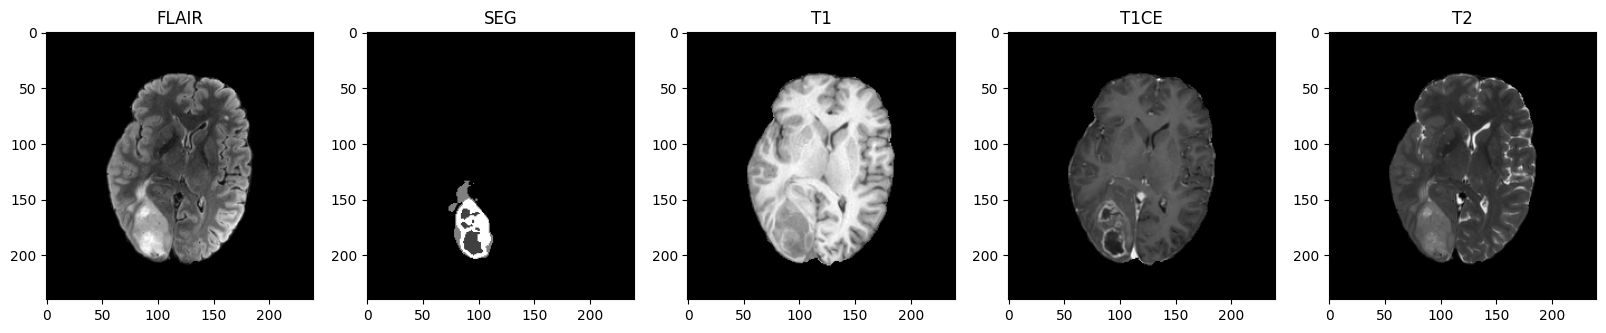

In [ ]:
# visualization of middle slices
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for i, (modality, arr) in enumerate(arrays.items()):
    slice_idx = arr.shape[0] // 2
    axes[i].imshow(arr[slice_idx, :, :], cmap='gray')
    axes[i].set_title(modality.upper())
plt.show()

## 🖼️ Task 2: Visualizing MRI Slices  

### 🔹 Step 1: Extract the Middle Slice  
- Select the **middle slice** from each **MRI modality** (`T1`, `T1ce`, `T2`, `Flair`) and the **segmentation mask** along the axial plane.

### 🔹 Step 2: Display the Slices Using Matplotlib  
- Use **Matplotlib** to visualise the extracted slices.
- Arrange the images in a grid for better comparison.

### 🔹 Step 3: Label Each Image  
- Ensure each displayed slice is labelled with its corresponding **modality name** (`T1`, `T1ce`, `T2`, `Flair`, `Segmentation Mask`).  
- Use appropriate **colour maps** to differentiate between MRI images and segmentation masks.

In [ ]:
images = {modality: sitk.ReadImage(path) for modality, path in file_paths.items()}
arrays = {modality: sitk.GetArrayFromImage(img) for modality, img in images.items()}

In [ ]:
# Step 1: Extract middle axial slice
def get_middle_slice(array):
    depth = array.shape[0]
    middle_slice_index = depth // 2
    return array[middle_slice_index, :, :]

middle_slices = {modality: get_middle_slice(arr) for modality, arr in arrays.items()}

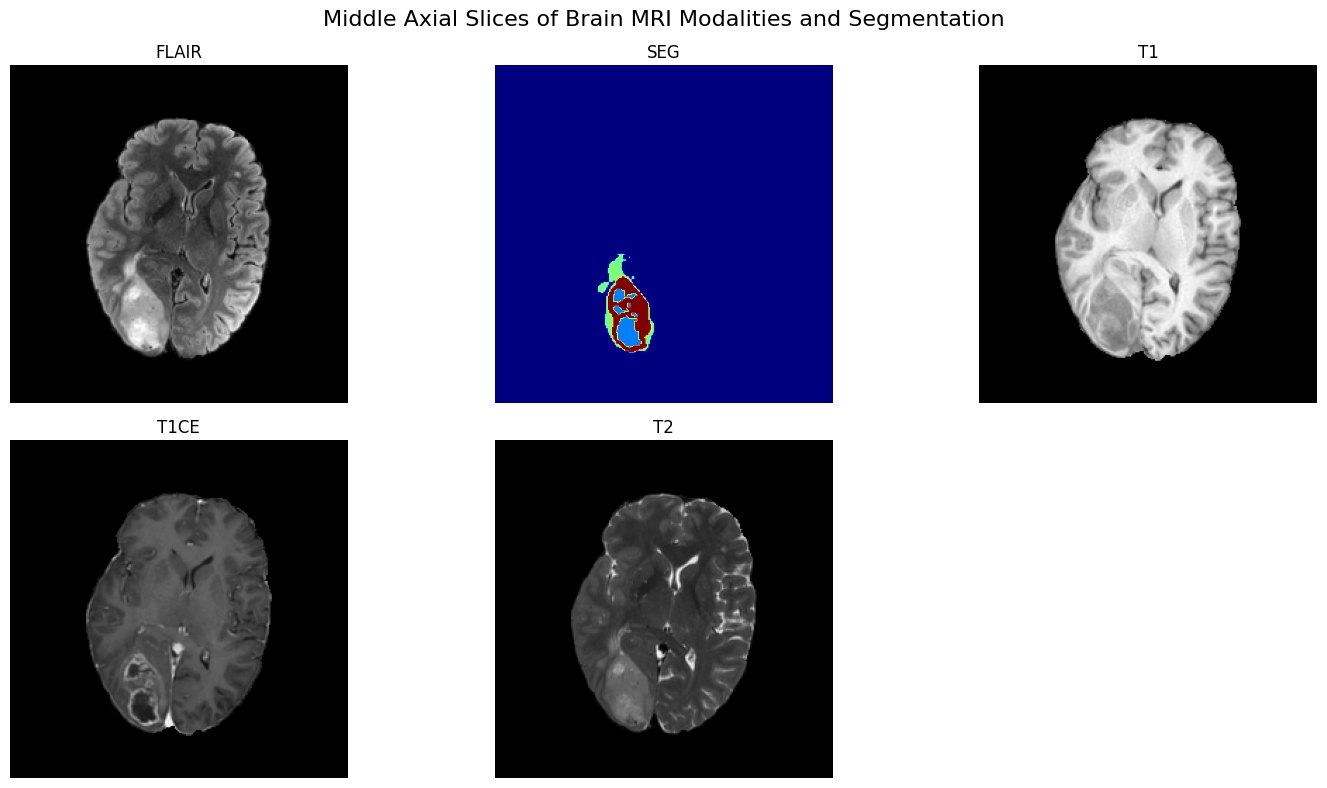

In [ ]:
 # Step 2 & 3: Display slices with matplotlib
plt.figure(figsize=(15, 8))

# Define colormaps - grayscale for MRIs, 'jet' for segmentation
cmaps = {
    't1': 'gray',
    't1ce': 'gray',
    't2': 'gray',
    'flair': 'gray',
    'seg': 'jet'  # Using 'jet' for better label distinction
}

# Plot each modality
for i, (modality, slice_data) in enumerate(middle_slices.items()):
    plt.subplot(2, 3, i+1)  # 2 rows, 3 columns layout
    plt.imshow(slice_data, cmap=cmaps[modality])
    plt.title(modality.upper())
    plt.axis('off')

plt.suptitle('Middle Axial Slices of Brain MRI Modalities and Segmentation', fontsize=16)
plt.tight_layout()
plt.show()

## 🛠️ Task 3: Data Augmentation  

In this task, you will apply **various transformations** to MRI scans using **TorchIO** and visualise the effects.

### 🔹 Installing TorchIO  
Before applying transformations, ensure that **TorchIO** is installed using the command:
`!pip install torchio`  

### 🔹 Transformations to Apply:
1️⃣ **Flip on the anteroposterior axis** (Always applied).  
2️⃣ **Flip on the lateral axis** (*50% probability*).  
3️⃣ **Centre Crop** to `(160, 160, 100)`.  
4️⃣ **Resample** to `0.75mm` isotropic resolution.
5️⃣ **Apply either the elastic or affine transformation** (*60% probability of Elastic*).  
6️⃣ **Blur the image** (*60% probability*).  
7️⃣ **Add Gaussian noise** (`mean=128, std=10`) **or rescale intensity**.  
8️⃣ **Apply Z-score normalisation**.  
9️⃣ **Concatenate 5 transformations** using `torchio.Compose()`.  

### 🔹 Applying the Transformations  
- Utilize **TorchIO** to implement the transformations on MRI scans.  
- Ensure each transformation is applied according to its specified probability.
- Maintain consistency in the processing pipeline.

### 🔹 Visualization  
- Display **before-and-after** MRI slices to observe the effects of transformations.
- Use **Matplotlib** for plotting.
- Label and organise images for clarity.

By the end of this task, you will gain hands-on experience with **data augmentation techniques** that enhance the generalizability of medical imaging models. 🚀  


In [ ]:
!pip install torchio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.9/175.9 kB 5.8 MB/s eta 0:00:00


In [ ]:
import torchio as tio

# Load the image (using T1 )
subject = tio.Subject(
    t1=tio.ScalarImage('/kaggle/working/BraTS2021_00495_t1.nii.gz'),
    seg=tio.LabelMap('/kaggle/working/BraTS2021_00495_seg.nii.gz')
)

# Define transformations with proper axis naming
transform = tio.Compose([
    # 1. Always flip on anteroposterior axis (A/P)
    tio.RandomFlip(axes=('A',), flip_probability=1),

    # 2. 50% probability flip on lateral axis (L/R)
    tio.RandomFlip(axes=('L',), flip_probability=0.5),

    # 3. Center crop
    tio.CropOrPad((160, 160, 100)),

    # 4. Resample to 0.75mm isotropic resolution
    tio.Resample(0.75),

    # 5. 60% probability Elastic, 40% Affine
    tio.OneOf({
        tio.RandomElasticDeformation(): 0.6,
        tio.RandomAffine(): 0.4,
    }),

    # 6. 60% probability blur
    tio.RandomBlur(std=(0, 2), p=0.6),

    # 7. Gaussian noise OR rescale intensity
    tio.OneOf({
        tio.RandomNoise(mean=128, std=10): 0.5,
        tio.RescaleIntensity((0, 1)): 0.5,
    }),

    # 8. Z-score normalization
    tio.ZNormalization(),
])

# Apply transformations
transformed = transform(subject)

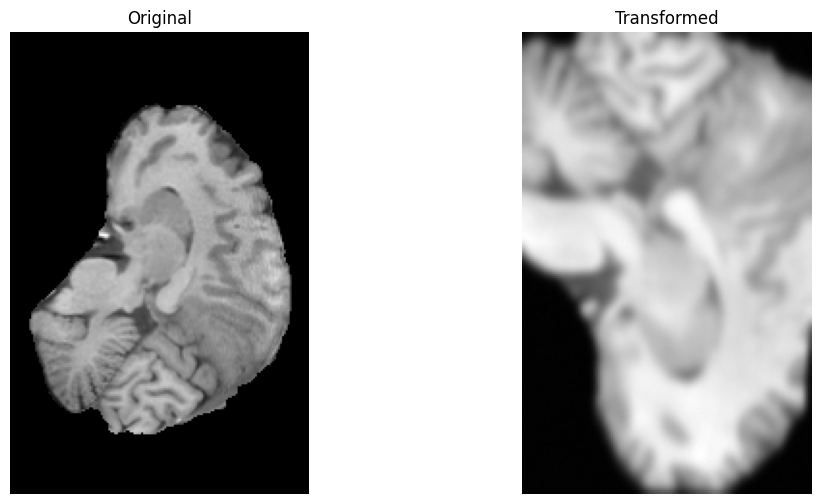

In [ ]:
# Visualization
def get_middle_slice(data):
    return data[data.shape[0]//2, :, :]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(get_middle_slice(subject.t1.numpy()[0]), cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(get_middle_slice(transformed.t1.numpy()[0]), cmap='gray')
plt.title('Transformed')
plt.axis('off')
plt.show()

In [ ]:
print(subject.t1.orientation)  # Shows current axis labels

('L', 'P', 'S')


## ✅ Question: Understanding Data Augmentation in Medical Imaging  

### 🔹 Why do we use different probabilities for transformations?  
In medical image preprocessing, we often apply **data augmentation** to introduce variability and improve model generalization. However, not all transformations should be applied with the same probability.  

- Why do some transformations have **fixed application** while others have a **probabilistic approach**?  
- How does this affect the **realism and effectiveness** of data augmentation?  

In [ ]:
## 1. Fixed (100%) vs. Probabilistic Transformations

"""
Fixed (Always Applied)

Used for essential preprocessing steps that don’t alter anatomical validity.
Certain preprocessing steps are necessary for standardizing the dataset. These include:

Resizing / Resampling → Ensures uniform input dimensions.

Intensity Normalization → Standardizes intensity across scans.

Bias Field Correction → Removes scanner-induced artifacts.

These transformations should always be applied because they ensure consistency in the input data.

Example:

Anteroposterior (A/P) Flip (100%) → Since brains are roughly symmetrical, flipping doesn’t distort realism.

Resampling (Fixed Resolution) → Ensures consistent voxel spacing for CNNs.

Z-Score Normalization (Always Applied) → Standardizes intensity ranges across scans.


--- Probabilistic (e.g., 50%, 60%)---

Used for variability-inducing augmentations that should not always be applied to maintain realism.

Augmentations like flipping, rotation, and noise injection are not always needed—applying them randomly enhances variability
while avoiding unrealistic distortions.

Examples:

Random Flips (p=0.5) → Simulates different orientations.

Random Noise (p=0.2) → Mimics scanner variability.

Elastic Deformation (p=0.3) → Accounts for anatomical variations.

If applied too frequently, these may introduce unrealistic patterns, harming model performance.

Lateral (L/R) Flip (50%) → While brains are mostly symmetrical, flipping every time may reduce diversity.

Blurring (60%) → Simulates motion artifacts but shouldn’t always be present.
"""

'\nFixed (Always Applied)\n\nUsed for essential preprocessing steps that don’t alter anatomical validity.\nCertain preprocessing steps are necessary for standardizing the dataset. These include:\n\nResizing / Resampling → Ensures uniform input dimensions.\n\nIntensity Normalization → Standardizes intensity across scans.\n\nBias Field Correction → Removes scanner-induced artifacts.\n\nThese transformations should always be applied because they ensure consistency in the input data.\n\nExample:\n\nAnteroposterior (A/P) Flip (100%) → Since brains are roughly symmetrical, flipping doesn’t distort realism.\n\nResampling (Fixed Resolution) → Ensures consistent voxel spacing for CNNs.\n\nZ-Score Normalization (Always Applied) → Standardizes intensity ranges across scans.\n\n\n--- Probabilistic (e.g., 50%, 60%)---\n\nUsed for variability-inducing augmentations that should not always be applied to maintain realism.\n\nAugmentations like flipping, rotation, and noise injection are not always need

In [ ]:
###  How Probabilities Impact Realism & Effectiveness

"""
Balancing Realism:

If augmentations are too aggressive, the model may learn non-existent patterns, leading to poor generalization.

If augmentations are too conservative, the model may fail to handle real-world variations.

Enhancing Generalization:

Controlled randomness prepares the model for unseen data, preventing overfitting to specific imaging conditions.

Augmentations like intensity shifts and slight deformations force the model to learn robust feature representations.
"""

'\nBalancing Realism:\n\nIf augmentations are too aggressive, the model may learn non-existent patterns, leading to poor generalization.\n\nIf augmentations are too conservative, the model may fail to handle real-world variations.\n\nEnhancing Generalization:\n\nControlled randomness prepares the model for unseen data, preventing overfitting to specific imaging conditions.\n\nAugmentations like intensity shifts and slight deformations force the model to learn robust feature representations.\n'

## 📦 Task 4: Writing a PyTorch DataLoader  

In this task, you will create a **custom PyTorch Dataset** to efficiently load and preprocess the **BraTS2021** dataset.

### 🔹 Steps to Follow:

1️⃣ **Extract the BraTS2021 Training Dataset**  
   - Locate and extract `"BraTS2021_Training_Data.tar"`.  
   - Ensure that the extracted files contain MRI modalities (`T1, T1ce, T2, Flair`) and segmentation masks (`Seg`).  

2️⃣ **Write a Custom PyTorch Dataset Class**  
   - Define a `Dataset` class that:
     - Reads the **training images** from the extracted dataset.
     - Loads MRI scans in **.nii.gz format**.  
     - Applies the **predefined transformations** from **TorchIO**.  
     - Returns the **image and segmentation mask** as tensors.

3️⃣ **Create a DataLoader**  
   - Initialize the **PyTorch DataLoader** with:  
     - Your **custom dataset**.  
     - `batch_size=5` (processes 5 images at a time).  
     - `shuffle=True` (shuffles data for better training generalisation).

### 🔹 Key Considerations:
✅ Ensure that your dataset class correctly handles **file reading and transformation applications**.  
✅ Verify that your **DataLoader** returns batches in the correct format.
✅ Test your DataLoader by iterating through a few batches and displaying **sample images**.  

By completing this task, you will gain hands-on experience in **handling 3D medical imaging datasets with PyTorch**, an essential skill for deep learning in medical AI. 🚀  

In [ ]:
import tarfile

# Path to your .tar file
tar_path = '/kaggle/input/brats-2021-task1/BraTS2021_Training_Data.tar'

# Directory where you want to extract the contents
extract_path = '/kaggle/working/data/'  #

# Open and extract the tar file
with tarfile.open(tar_path) as tar:
    tar.extractall(path=extract_path)

print(f"Files extracted to {extract_path}")

Files extracted to /kaggle/working/data/


In [ ]:
from torch.utils.data import Dataset, DataLoader
import nibabel as nib

In [ ]:
import os
class BRATSDataset(Dataset):
    def __init__(self, root_dir, transform=None, subset='train'):
        """
        Args:
            root_dir (string): Directory with all the patient folders
            transform (callable, optional): Optional transform to be applied
            subset (str): 'train' or 'val' for train/validation split
        """
        self.root_dir = root_dir
        self.transform = transform
        self.patient_dirs = sorted([d for d in os.listdir(root_dir) if d.startswith('BraTS2021_')])

        # Simple train/val split (80/20)
        split_idx = int(0.8 * len(self.patient_dirs))
        if subset == 'train':
            self.patient_dirs = self.patient_dirs[:split_idx]
        else:
            self.patient_dirs = self.patient_dirs[split_idx:]

    def __len__(self):
        return len(self.patient_dirs)

    def __getitem__(self, idx):
        patient_id = self.patient_dirs[idx]
        patient_path = os.path.join(self.root_dir, patient_id)

        # Load all modalities and segmentation
        modalities = {
            't1': os.path.join(patient_path, f'{patient_id}_t1.nii.gz'),
            't1ce': os.path.join(patient_path, f'{patient_id}_t1ce.nii.gz'),
            't2': os.path.join(patient_path, f'{patient_id}_t2.nii.gz'),
            'flair': os.path.join(patient_path, f'{patient_id}_flair.nii.gz'),
            'seg': os.path.join(patient_path, f'{patient_id}_seg.nii.gz'),
        }

        # Create TorchIO subject
        subject = tio.Subject(
            t1=tio.ScalarImage(modalities['t1']),
            t1ce=tio.ScalarImage(modalities['t1ce']),
            t2=tio.ScalarImage(modalities['t2']),
            flair=tio.ScalarImage(modalities['flair']),
            seg=tio.LabelMap(modalities['seg']),
            patient_id=patient_id,
        )

        if self.transform:
            subject = self.transform(subject)

        return subject

    @staticmethod
    def collate_fn(batch):
        # Stack all modalities and keep segmentation separate
        images = torch.stack([torch.cat([
            item['t1'][tio.DATA].float(),
            item['t1ce'][tio.DATA].float(),
            item['t2'][tio.DATA].float(),
            item['flair'][tio.DATA].float(),
        ], dim=0) for item in batch])

        segs = torch.stack([item['seg'][tio.DATA].float() for item in batch])

        return images, segs

In [ ]:
# Define preprocessing transforms
def get_transforms():
    # Normalization using Z-score normalization per modality
    normalization = tio.ZNormalization(masking_method=tio.ZNormalization.mean)

    # Common transforms for both train and validation
    common_transforms = [
        tio.ToCanonical(),  # Ensure RAS+ orientation
        tio.CropOrPad((240, 240, 155)),  # Standardize size
        normalization,
    ]

    # Training-specific transforms
    train_transforms = common_transforms + [
        tio.RandomFlip(axes=(0, 1, 2)),  # Random flips
        tio.RandomAffine(scales=(0.9, 1.1), degrees=10),  # Small affine transforms
        tio.RandomNoise(std=0.1),  # Add slight noise
        tio.RandomBiasField(coefficients=0.5),  # MRI bias field artifact
    ]

    # Validation transforms (just normalization and resizing)
    val_transforms = common_transforms

    return {
        'train': tio.Compose(train_transforms),
        'val': tio.Compose(val_transforms),
    }

In [ ]:
def create_data_loaders(root_dir, batch_size=5):
    transforms = get_transforms()

    train_dataset = BRATSDataset(
        root_dir=root_dir,
        transform=transforms['train'],
        subset='train'
    )

    val_dataset = BRATSDataset(
        root_dir=root_dir,
        transform=transforms['val'],
        subset='val'
    )

    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        collate_fn=BRATSDataset.collate_fn,
        num_workers=2,
    )

    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,
        collate_fn=BRATSDataset.collate_fn,
        num_workers=2,
    )

    return train_loader, val_loader

# Initialize data loaders
root_dir = '/kaggle/working/data/'  # Update if your path is different
train_loader, val_loader = create_data_loaders(root_dir, batch_size=5)

In [ ]:
import torch

Testing training DataLoader:


/usr/local/lib/python3.10/dist-packages/torchio/data/image.py:248: UserWarning: Using TorchIO images without a torchio.SubjectsLoader in PyTorch >= 2.3 might have unexpected consequences, e.g., the collated batches will be instances of torchio.Subject with 5D images. Replace your PyTorch DataLoader with a torchio.SubjectsLoader so that the collated batch becomes a dictionary, as expected. See https://github.com/TorchIO-project/torchio/issues/1179 for more context about this issue.
  warnings.warn(message, stacklevel=1)
/usr/local/lib/python3.10/dist-packages/torchio/data/image.py:248: UserWarning: Using TorchIO images without a torchio.SubjectsLoader in PyTorch >= 2.3 might have unexpected consequences, e.g., the collated batches will be instances of torchio.Subject with 5D images. Replace your PyTorch DataLoader with a torchio.SubjectsLoader so that the collated batch becomes a dictionary, as expected. See https://github.com/TorchIO-project/torchio/issues/1179 for more context about t

Batch 1
Images shape: torch.Size([5, 4, 240, 240, 155])
Segmentation shape: torch.Size([5, 1, 240, 240, 155])


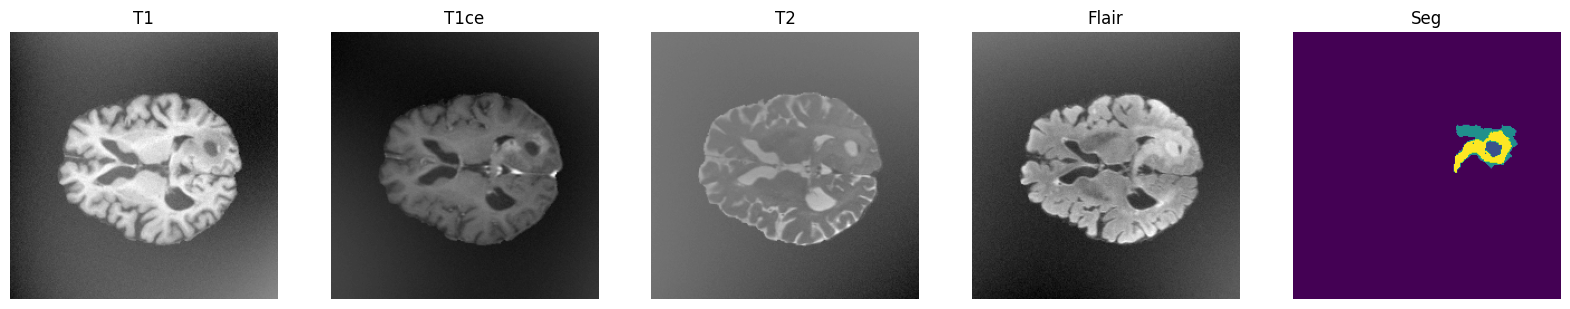

Batch 2
Images shape: torch.Size([5, 4, 240, 240, 155])
Segmentation shape: torch.Size([5, 1, 240, 240, 155])


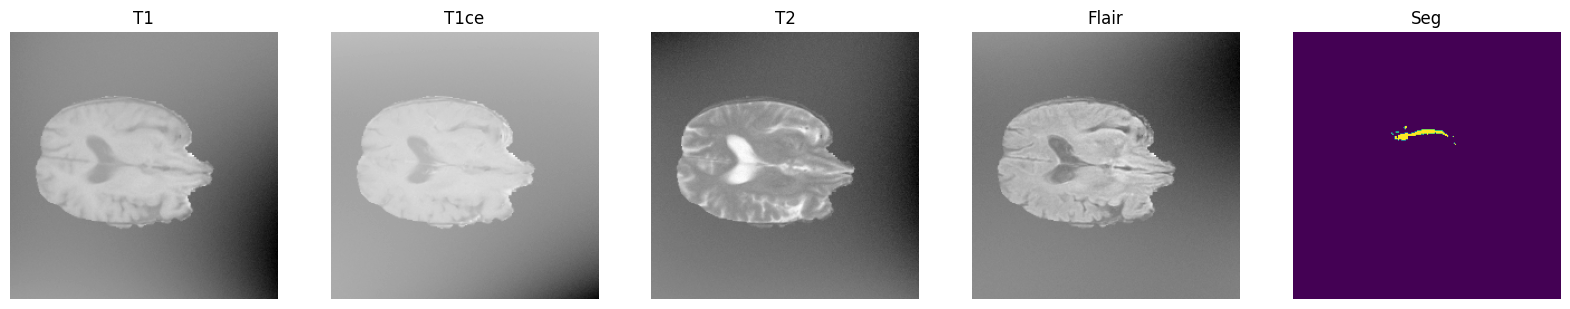


Testing validation DataLoader:


/usr/local/lib/python3.10/dist-packages/torchio/data/image.py:248: UserWarning: Using TorchIO images without a torchio.SubjectsLoader in PyTorch >= 2.3 might have unexpected consequences, e.g., the collated batches will be instances of torchio.Subject with 5D images. Replace your PyTorch DataLoader with a torchio.SubjectsLoader so that the collated batch becomes a dictionary, as expected. See https://github.com/TorchIO-project/torchio/issues/1179 for more context about this issue.
  warnings.warn(message, stacklevel=1)
/usr/local/lib/python3.10/dist-packages/torchio/data/image.py:248: UserWarning: Using TorchIO images without a torchio.SubjectsLoader in PyTorch >= 2.3 might have unexpected consequences, e.g., the collated batches will be instances of torchio.Subject with 5D images. Replace your PyTorch DataLoader with a torchio.SubjectsLoader so that the collated batch becomes a dictionary, as expected. See https://github.com/TorchIO-project/torchio/issues/1179 for more context about t

Batch 1
Images shape: torch.Size([5, 4, 240, 240, 155])
Segmentation shape: torch.Size([5, 1, 240, 240, 155])


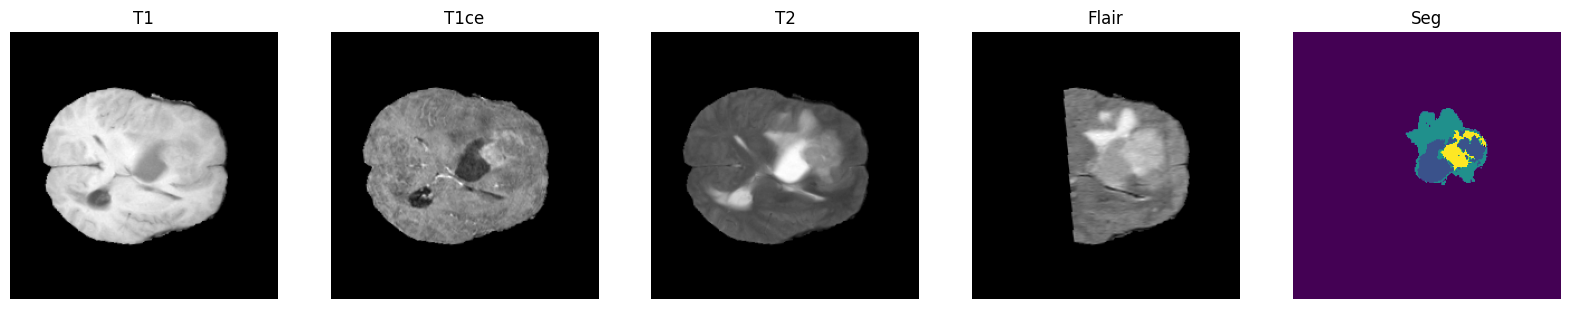

Batch 2
Images shape: torch.Size([5, 4, 240, 240, 155])
Segmentation shape: torch.Size([5, 1, 240, 240, 155])


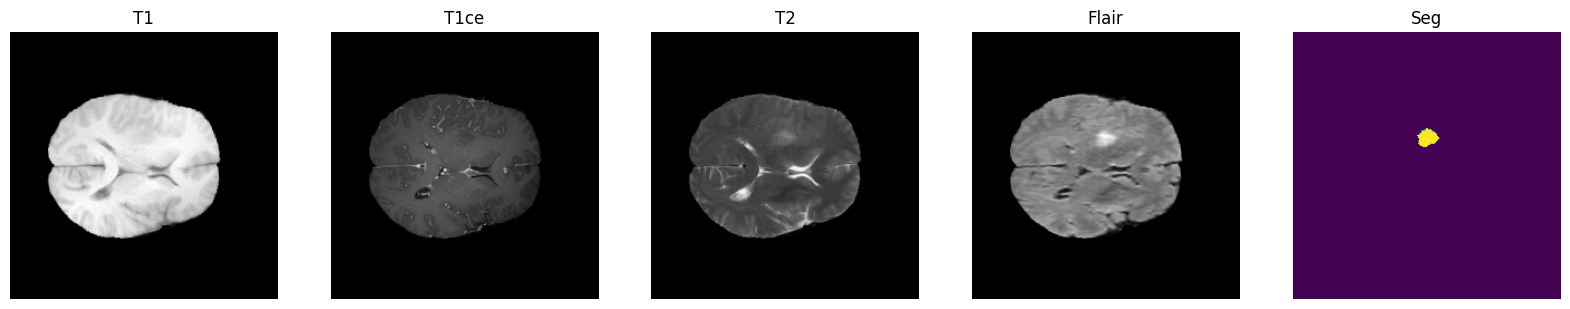

In [ ]:
def test_dataloader(loader, num_batches=2):
    for batch_idx, (images, segs) in enumerate(loader):
        print(f"Batch {batch_idx + 1}")
        print(f"Images shape: {images.shape}")  # Should be [batch_size, 4, H, W, D]
        print(f"Segmentation shape: {segs.shape}")  # Should be [batch_size, 1, H, W, D]

        # Visualize a slice from the first sample in batch
        sample_idx = 0
        slice_idx = images.shape[-1] // 2  # Middle slice

        fig, axes = plt.subplots(1, 5, figsize=(20, 4))
        modalities = ['T1', 'T1ce', 'T2', 'Flair', 'Seg']

        for i, (modality, ax) in enumerate(zip(modalities, axes)):
            if i < 4:  # Image modalities
                ax.imshow(images[sample_idx, i, :, :, slice_idx].cpu(), cmap='gray')
            else:  # Segmentation
                ax.imshow(segs[sample_idx, 0, :, :, slice_idx].cpu())
            ax.set_title(modality)
            ax.axis('off')

        plt.show()

        if batch_idx >= num_batches - 1:
            break

print("Testing training DataLoader:")
test_dataloader(train_loader)

print("\nTesting validation DataLoader:")
test_dataloader(val_loader)

## ✅ Question:  

### What does the DataLoader do, and why do we shuffle the data?  

- **What is the role of a PyTorch DataLoader?**  
  - How does it help in efficiently loading and processing large datasets?
  - Why is batch processing important in deep learning?

- **Why do we shuffle the data?**  
  - How does shuffling improve model generalisation?
  - What happens if we don't shuffle the dataset during training?

In [ ]:
"""
--------What is the role of a PyTorch DataLoader?-------
The DataLoader in PyTorch is responsible for efficiently loading and feeding data into a model during training and evaluation. It helps in:

Batching → Splits the dataset into smaller mini-batches for efficient processing and Combines individual samples into batches for processing.

Shuffling → Randomizes data order to improve model generalization.

Parallel Loading → Uses multiple worker threads (num_workers) to load data efficiently.

Automatic Batching → Converts data into tensors and prepares them for training.

Efficient data loading: Manages parallel data loading using multiprocessing

Memory management: Optimizes memory usage during training

--------How Does It Help in Efficiently Loading and Processing Large Datasets?-----------
Lazy Loading: Loads only a small batch at a time instead of the entire dataset in memory.

Parallel Data Loading: Uses multiple CPU cores to load data while the GPU trains the model.

Prefetching: Caches upcoming batches to prevent bottlenecks.

---------Why is Batch Processing Important in Deep Learning?-------------------
Computational Efficiency: Training on batches is faster and more memory-efficient than processing the entire dataset at once.

Stable Gradient Updates: Reduces variance in gradient updates, leading to more stable training.

Leveraging Hardware Acceleration: Modern GPUs process batches efficiently using parallel computations.

Better Generalization: Helps the model converge to optimal weights without overfitting to specific data points.

--------Why Do We Shuffle the Data?----------------------
Shuffling is done to ensure that the model sees different variations of data in each epoch, preventing the model from memorizing patterns instead of learning meaningful features.

🔹 How Does Shuffling Improve Model Generalization?

Prevents the model from learning the order of data instead of useful patterns.

Helps avoid bias toward a specific subset of data (e.g., if similar samples are grouped together).

Ensures diverse batches, leading to a more generalized model.

🔹 What Happens If We Don’t Shuffle the Dataset During Training?
🚨 Risks of Not Shuffling:

The model might overfit to specific patterns seen in the same order.

If data is sorted (e.g., all similar classes appearing together), the model may struggle to generalize.

It can result in poor convergence and lower accuracy on unseen data.

"""